In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def gcd(a, b):
    """Compute the greatest common divisor of a and b."""
    while b:
        a, b = b, a % b
    return abs(a)


def axial_to_cartesian(q, r, a=1.0):
    x = a * 3 / 2 * q
    y = a * np.sqrt(3) * (r + q / 2)
    return (x, y)


def brillouin_zone_ring(N):
    if N == 0:
        return [(0, 0)]

    results = []
    q, r = N, 0  # Start at (N, 0)
    directions = [
        (-1, +1),  # Down-left
        (-1, 0),  # Left
        (0, -1),  # Up-left
        (+1, -1),  # Up-right
        (+1, 0),  # Right
        (0, +1),  # Down-right
    ]

    for dir in directions:
        for _ in range(N):
            results.append((q, r))
            q += dir[0]
            r += dir[1]

    return results


def brillouin_zones_up_to(N):
    all_points = []
    for k in range(N + 1):
        all_points.extend(brillouin_zone_ring(k))
    return all_points

In [ ]:
N = 20
Q = np.arange(-N, N + 1)
R = np.arange(-N, N + 1)
x = []
y = []
c = []
for q in Q:
    for r in R:
        if q * q + r * r > 100:
            continue
        x_coord, y_coord = axial_to_cartesian(q, r)
        x.append(x_coord)
        y.append(y_coord)
        if gcd(q, r) == 1:
            c.append("red")
        else:
            c.append("blue")

In [ ]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, s=10, color=c, alpha=0.6)
# place (r,q) coordinates on each point
for i, (q, r) in enumerate(zip(x, y)):
    ax.text(
        q,
        r,
        f"({int((q * 2 / np.sqrt(3)) + (r / 2))}, {int(r)})",
        fontsize=8,
        ha="center",
        va="center",
    )
ax.set_aspect("equal")


In [28]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(8, 8))
point_set = set()
t = 0
for n in range(0, 6):
    points = set(brillouin_zone_ring(n))
    new_set = points - point_set
    x = []
    y = []
    color = plt.cm.viridis(n / 10)
    c = []
    s = []
    for q, r in points:
        x_coord, y_coord = axial_to_cartesian(q, r)
        x.append(x_coord)
        y.append(y_coord)
        if np.abs(gcd(q, r)) <= 1:
            c.append("black")
            s.append(5)
        else:
            c.append("lightgreen")
            s.append(10)
            t += 1
    ax.scatter(y, x, s=s, color=c)
    point_set.update(points)
ax.set_aspect("equal")
print(f"Total points: {t}")

Total points: 30


In [9]:
point_set = set()
t = 0
N = 10
points = brillouin_zones_up_to(N)
for q, r in points:
    if np.abs(gcd(q, r)) > 1:
        t += 1
print(f"Total points: {t}")

Total points: 138


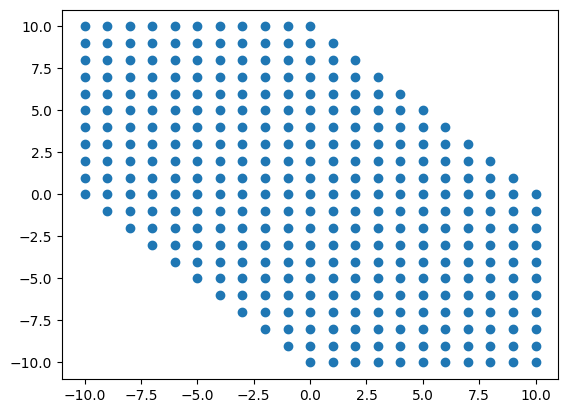

In [10]:
r = [r for q, r in points]
q = [q for q, r in points]
plt.scatter(r, q)

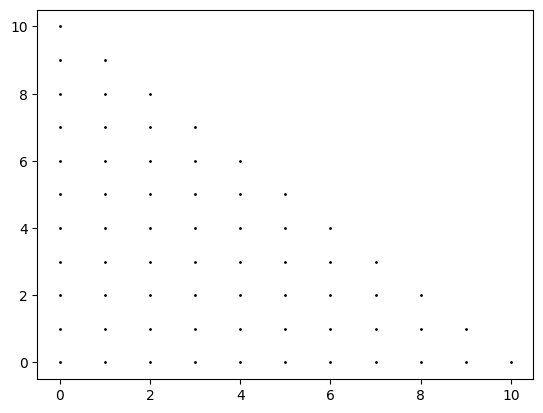

In [ ]:
R = np.arange(-10, 11)
Q = np.arange(-10, 11)
for r in R:
    for q in Q:
        if r + q < -10 or r + q > 10:
            continue
        elif r >= 0 and q >= 0:
            plt.scatter(r, q, color="black", s=1)

In [15]:
%matplotlib qt
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
point_set = set()
t = 0
N = 10
for n in range(0, N + 1):
    points = set(brillouin_zone_ring(n))
    new_set = points - point_set
    R = []
    Q = []
    x = []
    y = []
    color = plt.cm.viridis(n / 10)
    c = []
    s = []
    for q, r in points:
        x_coord, y_coord = axial_to_cartesian(q, r)
        Q.append(q)
        R.append(r)
        x.append(x_coord)
        y.append(y_coord)
        if np.abs(gcd(q, r)) <= 1:
            c.append("black")
            if q >= 0 and r >= 0:
                s.append(5 * 2 * 2)
            else:
                s.append(1 * 2 * 2)
        else:
            c.append("red")
            if q >= 0 and r >= 0:
                s.append(10 * 2 * 2)
            else:
                s.append(2 * 2 * 2)
            t += 1
    ax[0].scatter(y, x, s=s, color=c)
    ax[1].scatter(R, Q, s=s, color=c)
    point_set.update(points)
ax.set_aspect("equal")
print(f"Total points: {t}")

AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

In [59]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(8, 8))
point_set = set()
t = 0
N = 15
for n in range(0, N + 1):
    R = np.arange(-n, n + 1)
    Q = np.arange(-n, n + 1)
    points = set()
    for q in Q:
        for r in R:
            points.add((q, r))
    new_set = points - point_set
    R = []
    Q = []
    x = []
    y = []
    color = plt.cm.viridis(n / 10)
    c = []
    s = []
    for q, r in points:
        x_coord, y_coord = axial_to_cartesian(q, r)
        Q.append(q)
        R.append(r)
        x.append(x_coord)
        y.append(y_coord)
        if np.abs(gcd(q, r)) <= 1:
            c.append("black")
            if q >= 0 and r >= 0:
                s.append(5 * 2)
            else:
                s.append(1 * 2)
        else:
            c.append("lightgreen")
            if q >= 0 and r >= 0:
                s.append(10 * 2)
            else:
                s.append(2 * 2)
            t += 1
    # ax.scatter(y, x, s=s, color=c)
    ax.scatter(R, Q, s=s, color=c)
    point_set.update(points)
ax.set_aspect("equal")
print(f"Total points: {t}")

Total points: 2104


In [ ]:
a = brillouin_zones_up_to(int(1e6))

In [68]:
len(a) * 6 / np.pi**2 * 0.75

1369204.271096058